<font size="+3"><b><u>Pneumonia and COVID Detection using Transfer Learning</u></b></font>

<a id="5"></a>
<font color="blue" size=+2.5><b>Library Import</b></font>

In [1]:
#importing libraries
import fastai
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
print(fastai.__version__)
import warnings
warnings.filterwarnings('ignore')
from fastai.metrics import error_rate, accuracy

import torch
torch.cuda.device(0)
torch.cuda.get_device_capability()
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
print(torch.__version__)


1.0.61
True
NVIDIA GeForce RTX 3060 Ti
1.10.1+cu113


<a id="6"></a>
<font color="blue" size=+2.5><b>Setting up path for training data</b></font>

In [2]:
# path  = '../Datasets/CXR_20k'
path  = '../Skin Detect/new'
os.listdir(path)

['test', 'train', 'val']

<a id="7"></a>
<font color="blue" size=+2.5><b>Data Loading For training</b></font>
<br/>

In [3]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path,bs=32, train = 'train',
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4,test="test",valid="val").normalize(imagenet_stats)


<a id="8"></a>
<font color="blue" size=+2.5><b>Data Explorations</b></font>
<br/>

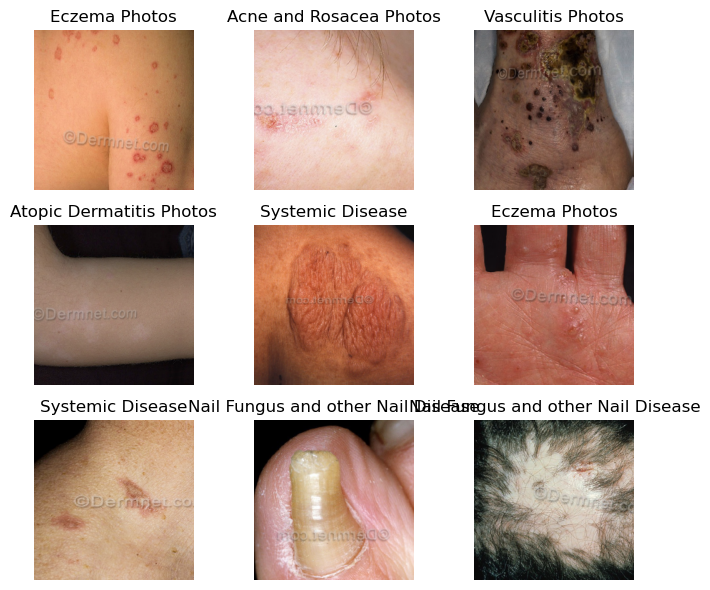

In [4]:
data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)

<a id="9"></a>
<font color="blue" size=+2.5><b>Print Classes present in the data</b></font>
<br/>

In [5]:
print(data.classes)
print("Train:",len(data.train_ds))
print("Val:",len(data.valid_ds))
print("Test:",len(data.test_ds))
data.c

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']
Train: 3192
Val: 414
Test: 396


23

In [6]:
data

ImageDataBunch;

Train: LabelList (3192 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Acne and Rosacea Photos,Acne and Rosacea Photos,Acne and Rosacea Photos,Acne and Rosacea Photos,Acne and Rosacea Photos
Path: ..\Skin Detect\new;

Valid: LabelList (414 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Acne and Rosacea Photos,Acne and Rosacea Photos,Acne and Rosacea Photos,Acne and Rosacea Photos,Acne and Rosacea Photos
Path: ..\Skin Detect\new;

Test: LabelList (396 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: ..\Skin Detect\new

<a id="10"></a>
<font color="blue" size=+2.5><b>4.1 Create Model</b></font>
<br/>

In [7]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy,error_rate], model_dir = Path('../Model'),path = Path("."))

<a id="11"></a>
<font color="blue" size=+2.5><b>4.2 Finding LR</b></font>
<br/>

In [8]:
print(learn.lr_find())

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
None


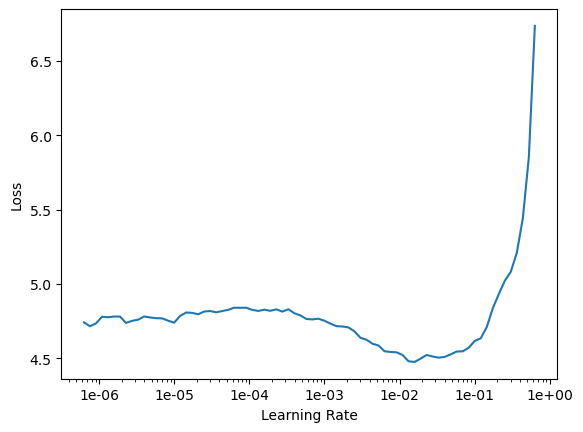

In [9]:
learn.recorder.plot(suggestions=True)

<a id="12"></a>
<font color="blue" size=+2.5><b>4.3 Train Model</b></font>
<br/>

In [10]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

In [11]:
# lr1 = 1e-3
lr = 1e-1
learn.fit_one_cycle(20,slice(lr))

<a id="13"></a>
<font color="blue" size=+2.5><b>4.4 Hyper Parameter Tuning</b></font>
<br/>

In [12]:
# #
# import gc
# gc.collect()
# torch.cuda.empty_cache()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


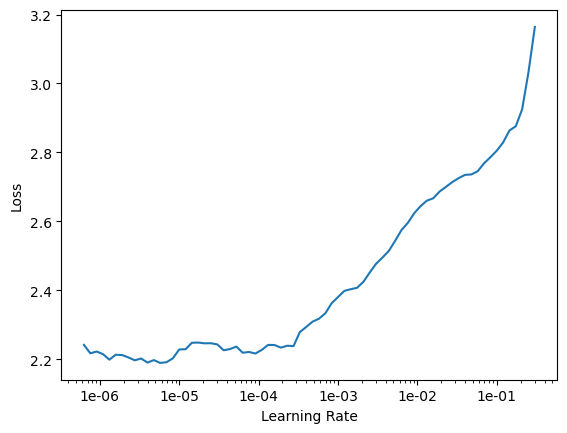

In [13]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

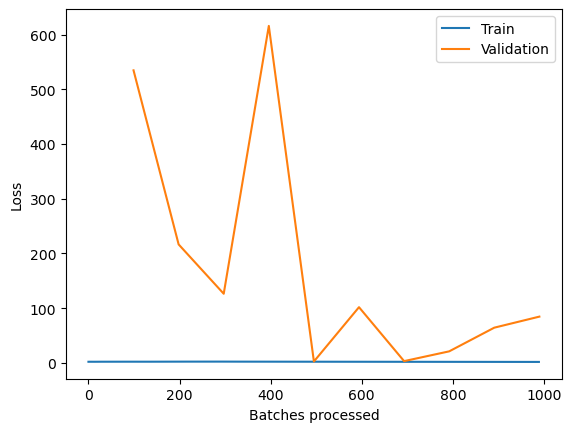

In [14]:
learn.recorder.plot_losses()

<a id="14"></a>
<font color="blue" size=+2.5><b>Interpret the results</b></font>
<br/>

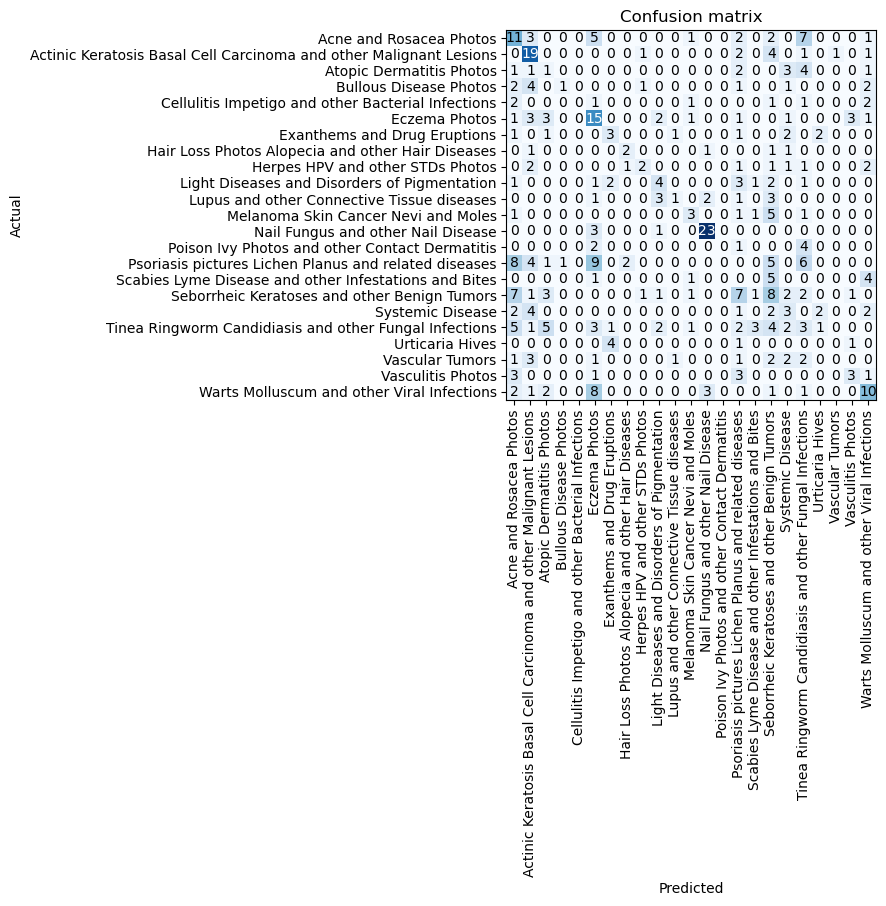

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

<a id="15"></a>
<font color="blue" size=+2.5><b>Validation of Model</b></font>
<br/>


[84.65219, tensor(0.2705), tensor(0.7295)]


[19.838768, tensor(0.1212), tensor(0.8788)]


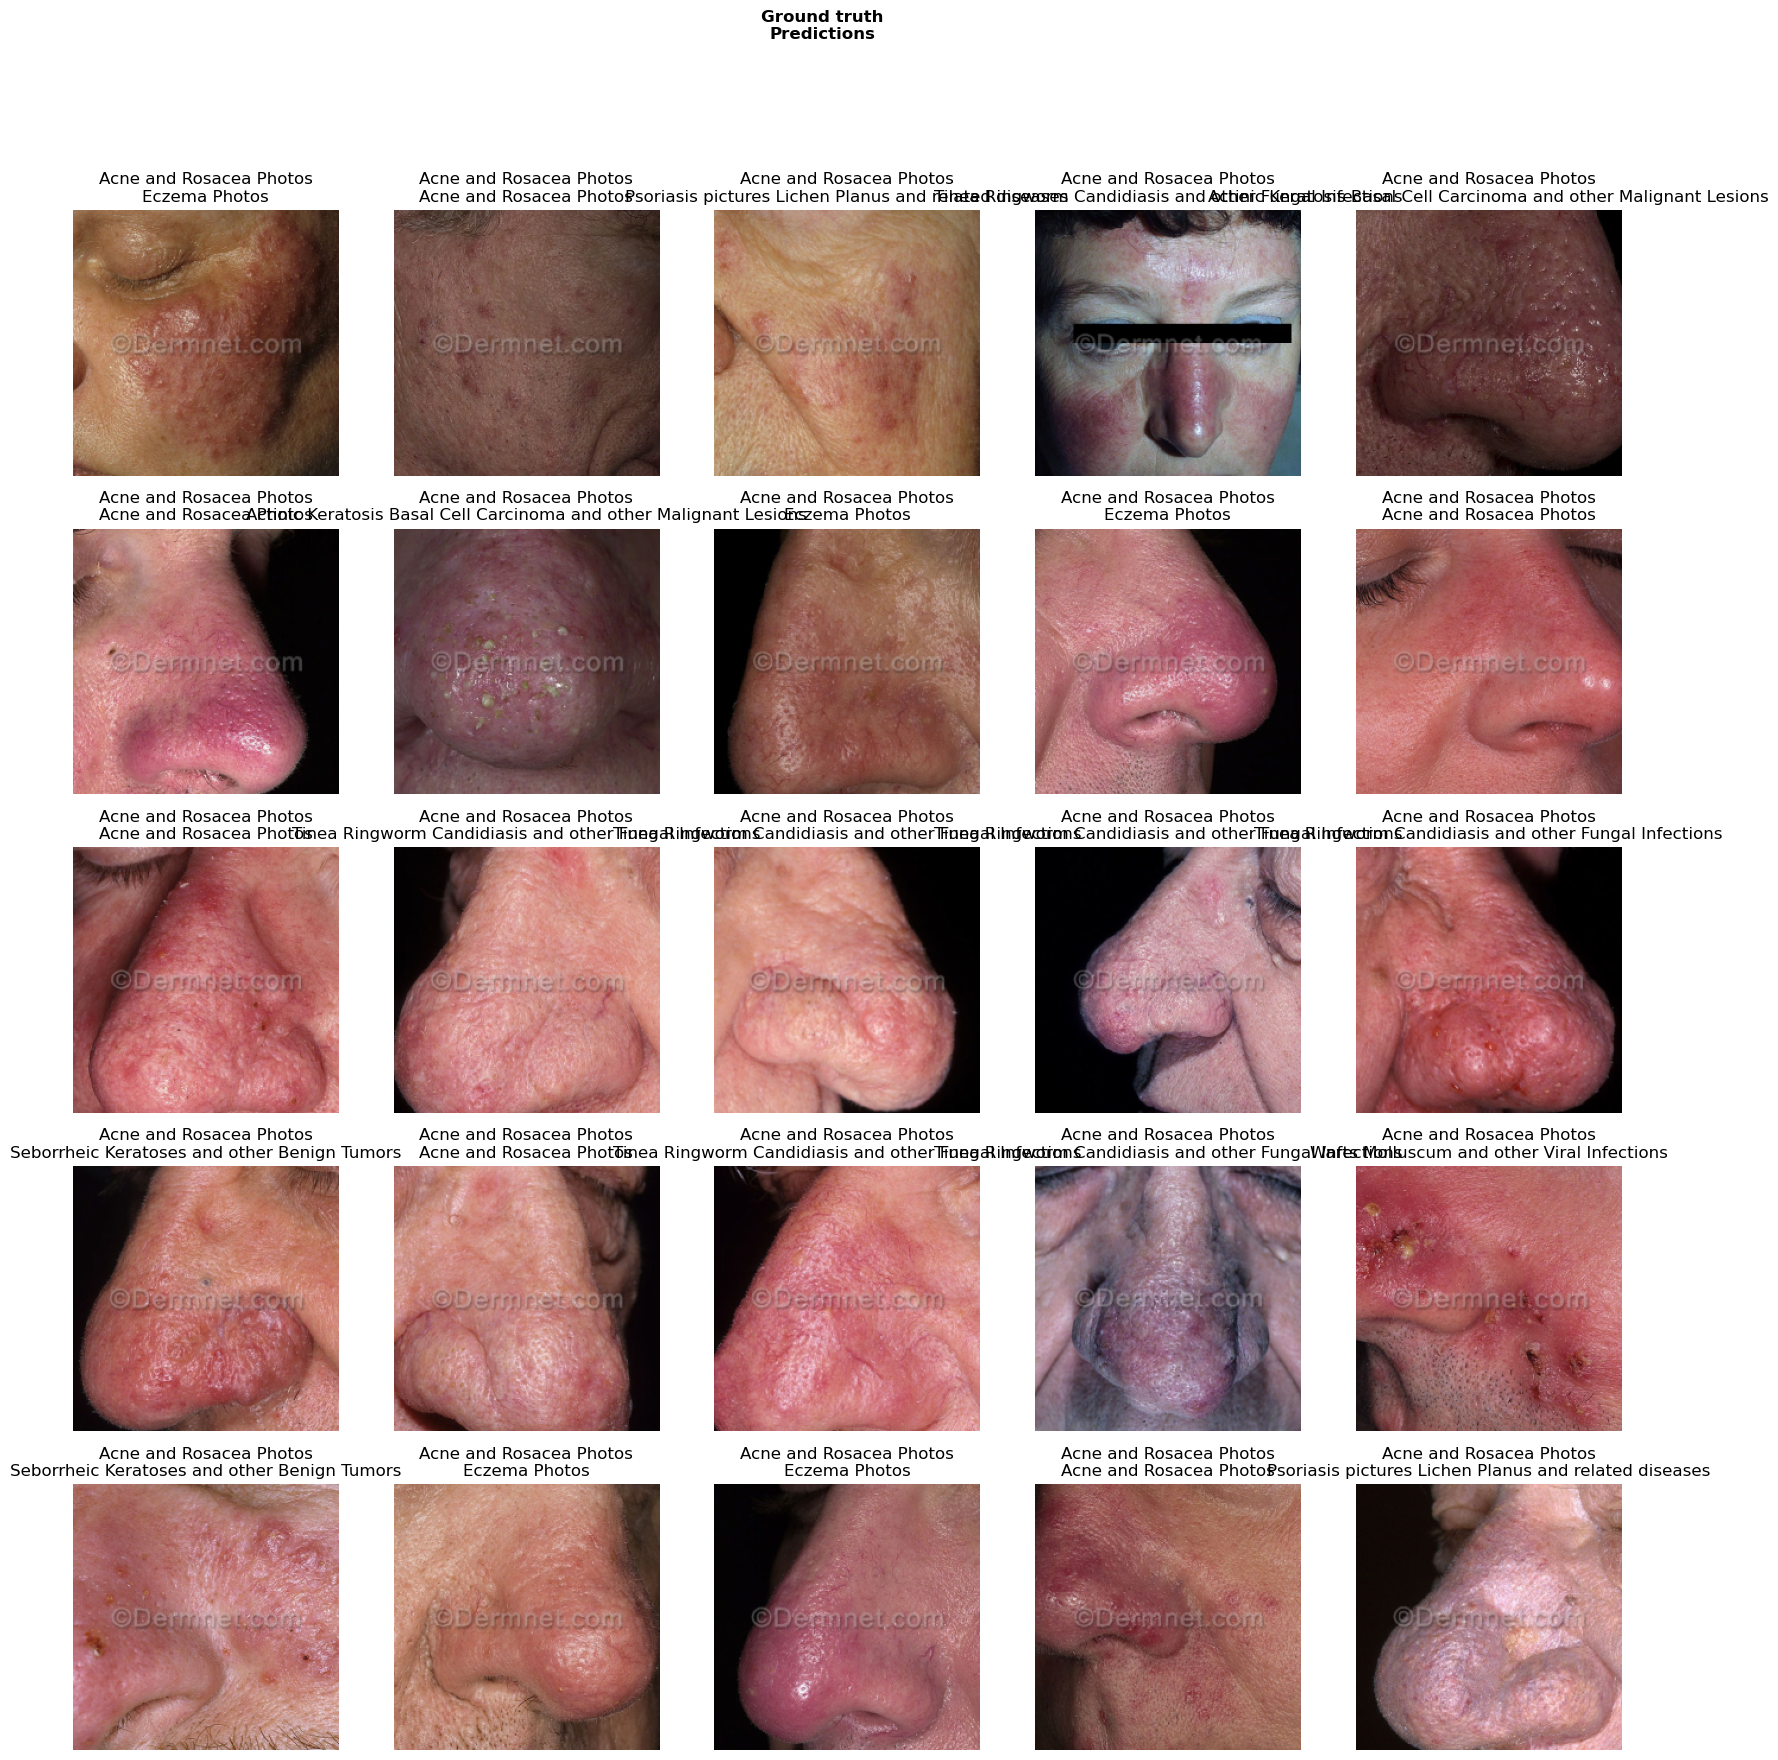

In [16]:
learn.show_results()
learn.validate()
print(learn.validate(learn.data.valid_dl))
print(learn.validate(learn.data.test_dl))

<a id="15"></a>
<font color="blue" size=+2.5><b>Confusion Matrix of Model</b></font>
<br/>

[[11  3  0  0 ...  0  0  0  1]
 [ 0 19  0  0 ...  0  1  0  1]
 [ 1  1  1  0 ...  0  0  0  1]
 [ 2  4  0  1 ...  0  0  0  2]
 ...
 [ 0  0  0  0 ...  0  0  1  0]
 [ 1  3  0  0 ...  0  0  0  0]
 [ 3  0  0  0 ...  0  0  3  1]
 [ 2  1  2  0 ...  0  0  0 10]]


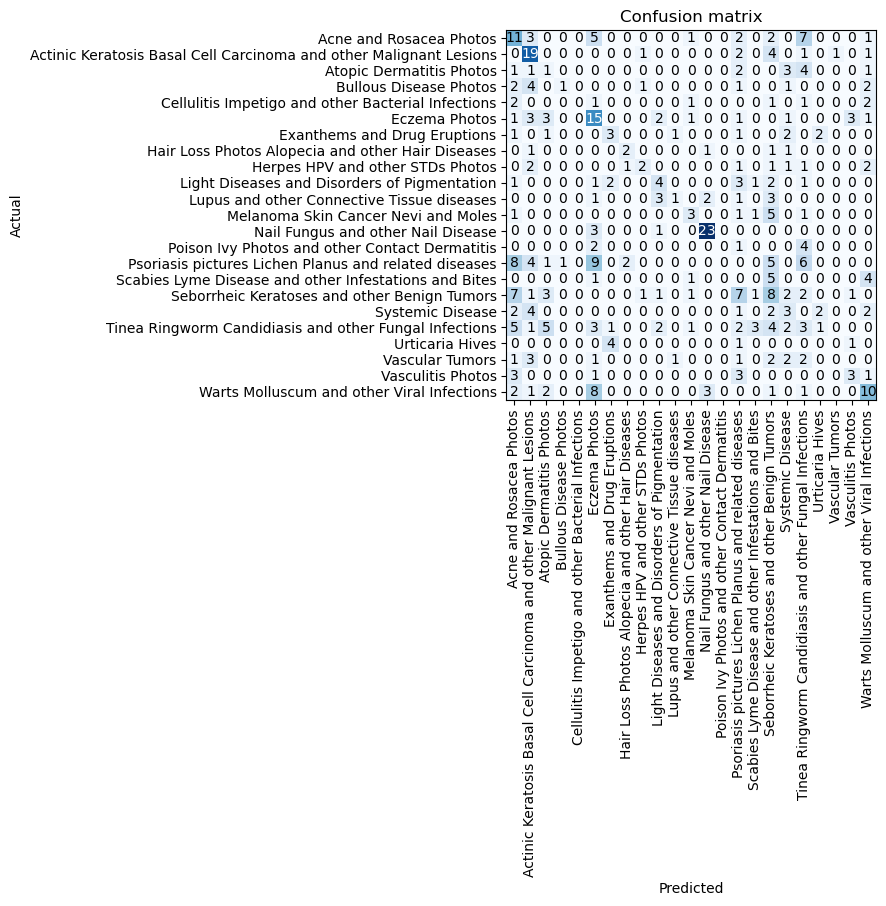

In [17]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
# print(losses)
interp.plot_confusion_matrix()
interp.top_losses()
conf = interp.confusion_matrix()
print(conf)

<a id="15"></a>
<font color="blue" size=+2.5><b>Prediction Using Trained Model</b></font>
<br/>

In [18]:
'''img_n = open_image('../Datasets/CXR_20k/test/NORMAL/IM-0063-0001.jpeg')
s =  open_image('../Sathak/sarthak.jpg')
img_c = open_image('../Datasets/CXR_20k/test/COVID/1-s2.0-S1684118220300682-main.pdf-002-a1.png')
img_p = open_image('../Datasets/CXR_20k/test/PNEUMONIA/person14_virus_44.jpeg')
print("NORMAL TEST:")
img_n.show()
print(learn.predict(img_n)[0],"\n")

print("COVID TEST:")
img_c.show()
print(learn.predict(img_c)[0],"\n")

print("PNEUMONIA TEST:")
img_p.show()
print(learn.predict(img_p)[0],"\n")

print("TEST:")
s.show()
print(learn.predict(s)[0],"\n")'''

'img_n = open_image(\'../Datasets/CXR_20k/test/NORMAL/IM-0063-0001.jpeg\')\ns =  open_image(\'../Sathak/sarthak.jpg\')\nimg_c = open_image(\'../Datasets/CXR_20k/test/COVID/1-s2.0-S1684118220300682-main.pdf-002-a1.png\')\nimg_p = open_image(\'../Datasets/CXR_20k/test/PNEUMONIA/person14_virus_44.jpeg\')\nprint("NORMAL TEST:")\nimg_n.show()\nprint(learn.predict(img_n)[0],"\n")\n\nprint("COVID TEST:")\nimg_c.show()\nprint(learn.predict(img_c)[0],"\n")\n\nprint("PNEUMONIA TEST:")\nimg_p.show()\nprint(learn.predict(img_p)[0],"\n")\n\nprint("TEST:")\ns.show()\nprint(learn.predict(s)[0],"\n")'

<a id="15"></a>
<font color="blue" size=+2.5><b>Heat Map</b></font>
<br/>


In [19]:
m = learn.model.eval()

In [43]:
idx = 400

Warts Molluscum and other Viral Infections


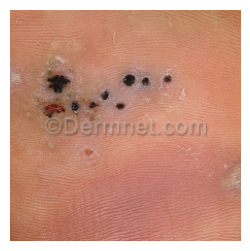

In [44]:
x,y = data.valid_ds[idx]
x.show()
x.shape
print(data.valid_ds.y[idx])

In [45]:
xb,_ = data.one_item(x) #takes all the settings from our previously created data object
xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()
xb.shape

torch.Size([1, 3, 224, 224])

In [46]:
from fastai.callbacks.hooks import *


In [47]:
def hooked_backward(lung=y):
    with hook_output(m[0]) as hook_a: #Get activations from the convolution layers
        with hook_output(m[0], grad = True) as hook_g: #Get gradient from convolution layers
            preds = m(xb) #DO foreward pass through model
            preds[0,int(lung)].backward()
    return hook_a, hook_g

In [48]:
hook_a, hook_g = hooked_backward()

In [49]:
acts = hook_a.stored[0].cpu()
acts.shape #Now we see our chanels over the 7x7 sections of the image

torch.Size([2048, 7, 7])

In [50]:
avg_acts = acts.mean(0)
avg_acts.shape

torch.Size([7, 7])

In [51]:
def show_heatmap(hm):
    _,ax = plt.subplots()
    xb_im.show(ax) #fastai function to show the image
    ax.imshow(hm, alpha = 0.6, extent = (0,224,224, 0), #extent expands the 11x11 image to 224,224
             interpolation = 'bilinear', cmap = 'magma')


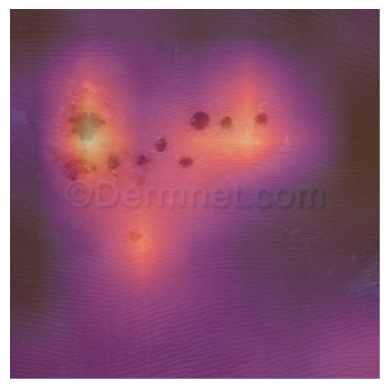

In [52]:
show_heatmap(avg_acts)

<a id="16"></a>
<font color="blue" size=+2.5><b>5.3 Save and Load Model</b></font>
<br/>


In [53]:
#Torch
learn.export(file = Path("../Skin Detect/Model/skin.json"))
learn.model_dir = "../Skin Detect/Model/"
learn.save("skin",return_path=True)

WindowsPath('../Skin Detect/Model/skin.pth')

Python version
3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)
